## Exam Final

# Obtener el mapa de Miraflores

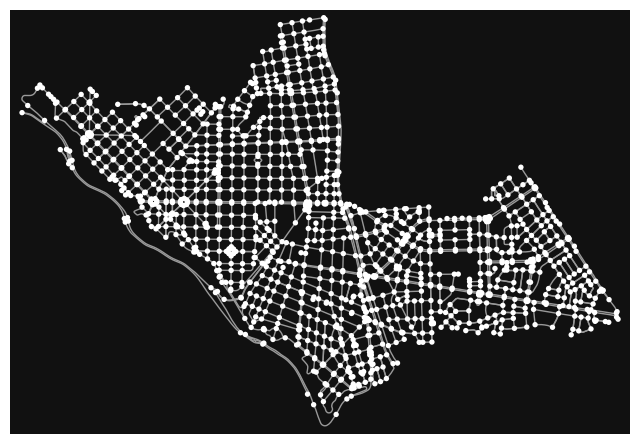

MultiDiGraph with 1341 nodes and 2639 edges


In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

# Definir el lugar y descargar el gráfico de red
place_name = "Miraflores, Lima, Peru"
G = ox.graph_from_place(place_name, network_type='drive')

# Convertir los nodos a un DataFrame
nodes, edges = ox.graph_to_gdfs(G)

# Visualizar el gráfico de red
fig, ax = ox.plot_graph(G)
plt.show()

print(G)


# Obtener las iglesias

In [5]:
place_name = "Miraflores, Lima, Peru"
tags  = {'amenity': 'place_of_worship', 'religion': '*'}  # Tags para buscar iglesias
graph = ox.graph_from_place(place_name, network_type='drive')
points= ox.features_from_place(place_name, tags)
print(len(points))

21


                                       geometry           amenity  \
element id                                                          
node    2023937422  POINT (-77.02228 -12.12804)  place_of_worship   
        2176685674  POINT (-77.02261 -12.12881)  place_of_worship   
        7563142672  POINT (-77.04085 -12.11341)  place_of_worship   
        7617857387  POINT (-77.03977 -12.11421)  place_of_worship   

                                                                name  \
element id                                                             
node    2023937422  Parroquia Nuestra Señora del Carmen - Miraflores   
        2176685674                      Centro Parroquial Carmelitas   
        7563142672                              Union Church of Lima   
        7617857387                                             Piano   

                     religion                             source denomination  \
element id                                                             

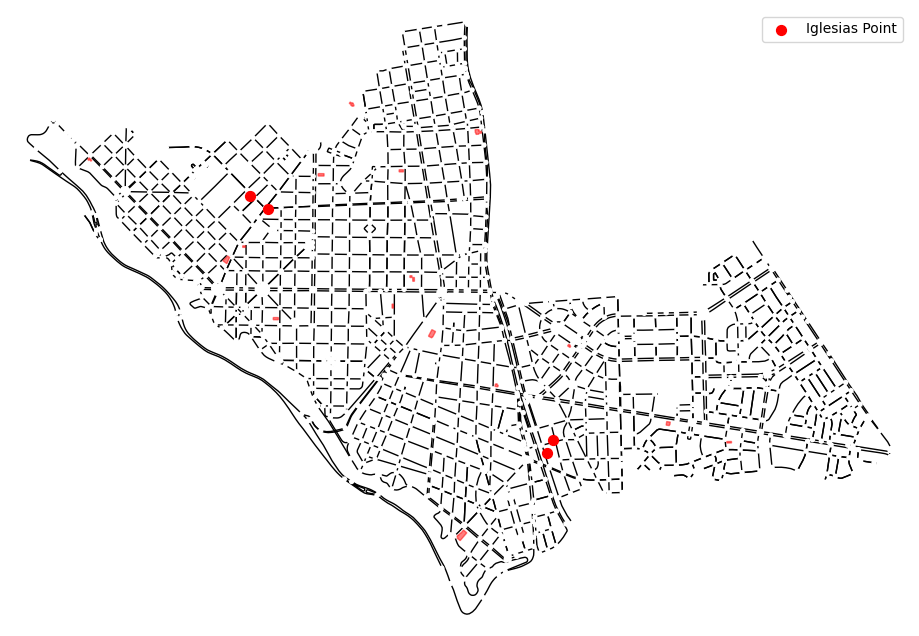

Cantidad de iglesias en Miraflores, Lima, Peru: 21


In [6]:
# Definir el lugar y los tags para buscar iglesias cristianas
place_name = "Miraflores, Lima, Peru"
tags = {'amenity': 'place_of_worship', 'religion': 'christian'}

# Descargar la red vial
G = ox.graph_from_place(place_name, network_type='drive')

# Descargar las iglesias utilizando features_from_place
iglesias = ox.features_from_place(place_name, tags)

# Visualizar el gráfico de red
fig, ax = plt.subplots(figsize=(12, 8))
ox.plot_graph(G, ax=ax, show=False, close=False, edge_color='black')

# Visualizar los puntos de iglesias sobre el gráfico
puntos_iglesias = iglesias[iglesias.geometry.type == 'Point']
print(puntos_iglesias)
ax.scatter(puntos_iglesias.geometry.x, puntos_iglesias.geometry.y, color='red', s=50, label='Iglesias Point')

# Visualizar los polígonos de iglesias sobre el gráfico
poligonos_iglesias = iglesias[iglesias.geometry.type == 'Polygon']
for idx, row in poligonos_iglesias.iterrows():
    ax.add_patch(plt.Polygon(list(row['geometry'].exterior.coords), color='red', alpha=0.5))#, label='Iglesias Polygon'))

ax.legend()
# Mostrar el mapa
plt.show()

# Mostrar la cantidad de iglesias
print(f"Cantidad de iglesias en {place_name}: {len(puntos_iglesias) + len(poligonos_iglesias)}")


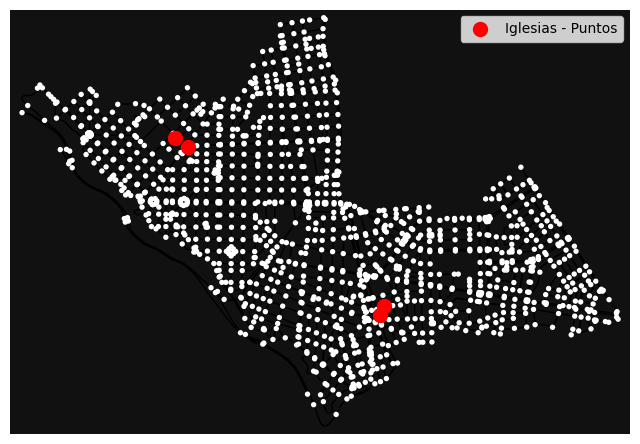

In [4]:
# Definir el lugar y los tags para buscar iglesias cristianas
place_name = "Miraflores, Lima, Peru"
tags = {'amenity': 'place_of_worship', 'religion': 'christian'}

# Descargar la red vial
G = ox.graph_from_place(place_name, network_type='drive')

# Descargar las iglesias utilizando features_from_place
iglesias = ox.features_from_place(place_name, tags)

# Convertir los nodos a un DataFrame
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Visualizar el gráfico de red
fig, ax = ox.plot_graph(G, show=False, close=False, edge_color='black')

# Visualizar los puntos de iglesias sobre el gráfico
puntos_iglesias = iglesias[iglesias.geometry.type == 'Point']
ax.scatter(puntos_iglesias.geometry.x, puntos_iglesias.geometry.y, color='red', s=100, label='Iglesias - Puntos')

# Visualizar los polígonos de iglesias sobre el gráfico
#poligonos_iglesias = iglesias[iglesias.geometry.type == 'Polygon']
#for idx, row in poligonos_iglesias.iterrows():
#    ax.add_patch(plt.Polygon(list(row['geometry'].exterior.coords), color='red', alpha=0.3))

ax.legend()

plt.show()


# Preprocesamiento del Grafo

In [9]:
import networkx as nx

#Eliminar nodos aislados (ubicaciones aisladas):
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

#Eliminar rutas ciegas:
dead_ends = [node for node, degree in dict(G.degree()).items() if degree == 1]
# Opcional: asegúrate de que no formen parte de un ciclo necesario
G.remove_nodes_from(dead_ends)

#Eliminar rutas cerradas:
#cycles = list(nx.simple_cycles(G))  # Esto funcionará si G es un digrafo
# Para eliminar nodos de un ciclo puedes hacer:
#for cycle in cycles:
#    G.remove_node(cycle[0])  # Elimina un nodo del ciclo


    
    

# Estadisticos

Número de Ubicaciones (Nodos):  1341
Número de Bordes (Aristas):  2639


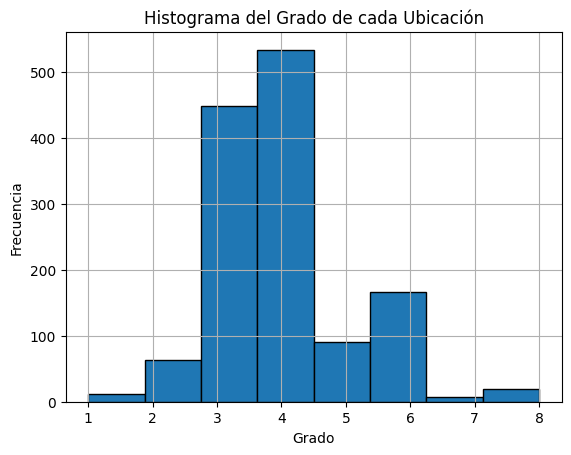

Radio del Grafo:  34
Diámetro del Grafo:  68


In [2]:
num_nodes = G.number_of_nodes()
print("Número de Ubicaciones (Nodos): ",num_nodes)

num_edges = G.number_of_edges()
print("Número de Bordes (Aristas): ", num_edges)

import matplotlib.pyplot as plt
degrees = [degree for node, degree in G.degree()]
plt.hist(degrees, bins=max(degrees)-min(degrees)+1, edgecolor='black')
plt.title("Histograma del Grado de cada Ubicación")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.xticks(range(min(degrees), max(degrees)+1))
plt.grid(True)
plt.show()

import networkx as nx
#shortest_path_length = nx.shortest_path_length(G.to_undirected(), source=1, target=5)
#print("Estimación Inicial de la Distancia Más Corta: ",shortest_path_length)

graph_radius = nx.radius(G.to_undirected())
print("Radio del Grafo: ", graph_radius)
graph_diameter = nx.diameter(G.to_undirected())
print("Diámetro del Grafo: ", graph_diameter)


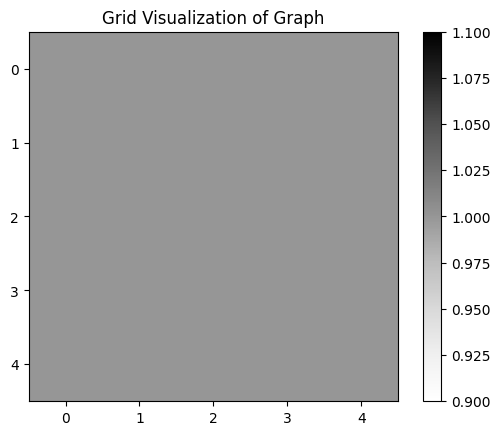

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Crear un grafo simple
G = nx.grid_2d_graph(5, 5)  # Crea un grafo en forma de grilla 5x5

# Crear una matriz vacía del tamaño de la grilla
grid_size = 5
matrix = np.zeros((grid_size, grid_size))

# Llenar la matriz basada en la existencia de nodos en el grafo
for (x, y) in G.nodes():
    matrix[x, y] = 1  # Asignar 1 donde hay un nodo

# Visualizar la matriz
plt.imshow(matrix, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Grid Visualization of Graph')
plt.show()

# Buscando el distrito mas conveniente

In [8]:
import osmnx as ox
import matplotlib.pyplot as plt

distritos = ["Ancón","Ate","Barranco","Breña","Carabayllo","Chaclacayo","Chorrillos","Cieneguilla","Comas","El Agustino","Independencia","Jesús María","La Molina","La Victoria","Lince","Los Olivos","Lurigancho","Lurín","Magdalena del Mar","Miraflores","Pucusana","Pueblo Libre","Puente Piedra","Punta Hermosa","Punta Negra","Rímac","San Bartolo","San Borja","San Isidro","San Juan de Lurigancho","San Juan de Miraflores","San Luis","San Martín de Porres","San Miguel","Santa Anita","Santa María del Mar","Santa Rosa","Santiago de Surco","Surquillo","Villa El Salvador","Villa María del Triunfo"]
tags  = {'amenity': 'place_of_worship', 'religion': 'christian'}  # Tags para buscar iglesias

def info(distrito: str):
    place_name = distrito + ", Lima, Peru"
    graph = ox.graph_from_place(place_name, network_type='drive')
    iglesias= ox.features_from_place(place_name, tags)
    puntos_iglesias = iglesias[iglesias.geometry.type == 'Point']
    poligonos_iglesias = iglesias[iglesias.geometry.type == 'Polygon']
    print(f"Distrito: {distrito} , iglesias puntos: {len(puntos_iglesias)} , iglesias poligono: {len(poligonos_iglesias)}")
    
for dist in distritos:
    info(dist)

Distrito: Ancón , iglesias puntos: 3 , iglesias poligono: 12
Distrito: Ate , iglesias puntos: 17 , iglesias poligono: 26
Distrito: Barranco , iglesias puntos: 9 , iglesias poligono: 11
Distrito: Breña , iglesias puntos: 3 , iglesias poligono: 11
Distrito: Carabayllo , iglesias puntos: 9 , iglesias poligono: 22
Distrito: Chaclacayo , iglesias puntos: 2 , iglesias poligono: 10
Distrito: Chorrillos , iglesias puntos: 17 , iglesias poligono: 48
Distrito: Cieneguilla , iglesias puntos: 1 , iglesias poligono: 11
Distrito: Comas , iglesias puntos: 16 , iglesias poligono: 35
Distrito: El Agustino , iglesias puntos: 5 , iglesias poligono: 11
Distrito: Independencia , iglesias puntos: 4 , iglesias poligono: 17
Distrito: Jesús María , iglesias puntos: 3 , iglesias poligono: 8
Distrito: La Molina , iglesias puntos: 10 , iglesias poligono: 25
Distrito: La Victoria , iglesias puntos: 11 , iglesias poligono: 12
Distrito: Lince , iglesias puntos: 4 , iglesias poligono: 10
Distrito: Los Olivos , iglesi

# Ejemplo de Busqueda de la ruta mas corta

In [17]:
import networkx as nx

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir nodos y aristas con pesos. Asumiendo que algunos nodos son iglesias y otros no.
edges = [
    ('Iglesia1', 'Iglesia2', 10.0),
    ('Iglesia2', 'Iglesia3', 7.5),
    ('Iglesia3', 'Iglesia4', 2.0),
    ('Iglesia4', 'Iglesia1', 2.5),
    ('Iglesia1', 'NodoA', 0.5),
    ('NodoA', 'NodoB', 0.5),
    ('NodoB', 'Iglesia2', 0.5),
    ('NodoC', 'Iglesia3', 0.7)
]

G.add_weighted_edges_from(edges)

# Lista de nodos que son iglesias
church_nodes = ['Iglesia1', 'Iglesia2', 'Iglesia3', 'Iglesia4']
def find_best_church_route(graph, church_nodes):
    import itertools
    import sys

    best_path = []
    min_cost = sys.maxsize

    # Considerar todas las permutaciones de iglesias para encontrar el camino más corto que visita todas
    for permutation in itertools.permutations(church_nodes):
        current_cost = 0
        valid_path = True
        path = []

        for i in range(len(permutation) - 1):
            start, end = permutation[i], permutation[i + 1]
            try:
                # Encontrar el camino más corto entre cada par de iglesias consecutivas
                shortest_path = nx.shortest_path(graph, start, end, weight='weight')
                path_cost = sum(graph[u][v]['weight'] for u, v in zip(shortest_path[:-1], shortest_path[1:]))
                current_cost += path_cost
                path.extend(shortest_path[:-1])
            except nx.NetworkXNoPath:
                valid_path = False
                break

        if valid_path and current_cost < min_cost:
            min_cost = current_cost
            best_path = path + [permutation[-1]]

    return best_path, min_cost

# Encuentra la mejor ruta y costo
path, total_cost = find_best_church_route(G, church_nodes)

print("Mejor ruta para recorrer todas las iglesias:", path)
print("Costo total de recorrido:", total_cost)



Mejor ruta para recorrer todas las iglesias: ['Iglesia3', 'Iglesia4', 'Iglesia1', 'NodoA', 'NodoB', 'Iglesia2']
Costo total de recorrido: 6.0


In [4]:
import networkx as nx
import itertools
import sys

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir nodos con posiciones (x, y) para utilizar en la heurística
G.add_node('Iglesia1', pos=(1, 2))
G.add_node('Iglesia2', pos=(5, 5))
G.add_node('Iglesia3', pos=(8, 3))
G.add_node('Iglesia4', pos=(12, 8))
G.add_node('NodoA', pos=(2, 6))
G.add_node('NodoB', pos=(6, 9))
G.add_node('NodoC', pos=(7, 2))

# Añadir aristas con pesos (distancias)
edges = [
    ('Iglesia1', 'Iglesia2', 9),
    ('Iglesia2', 'Iglesia3', 3),
    ('Iglesia3', 'Iglesia4', 5),
    ('Iglesia4', 'Iglesia1', 7),
    ('Iglesia1', 'NodoA', 1),
    ('NodoA', 'NodoB', 2),
    ('NodoB', 'Iglesia2', 2),
    ('NodoC', 'Iglesia3', 1)
]

# Asegurarse de que los pesos se añaden correctamente como atributo 'weight'
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# Lista de nodos que son iglesias
church_nodes = ['Iglesia1', 'Iglesia2', 'Iglesia3', 'Iglesia4']

# Función heurística basada en la distancia euclidiana
def heuristic(u, v):
    ux, uy = G.nodes[u]['pos']
    vx, vy = G.nodes[v]['pos']
    return ((ux - vx) ** 2 + (uy - vy) ** 2) ** 0.5

# Función para encontrar la mejor ruta que recorre todas las iglesias usando A*
def find_best_church_route_a_star(graph, church_nodes):
    best_path = []
    min_cost = sys.maxsize

    # Considerar todas las permutaciones de iglesias
    for permutation in itertools.permutations(church_nodes):
        current_cost = 0
        path = []
        valid_path = True

        for i in range(len(permutation) - 1):
            start, end = permutation[i], permutation[i + 1]
            print("start: ", start, "end: ", end)
            try:
                shortest_path = nx.astar_path(graph, start, end, heuristic=heuristic, weight='weight')
                path_cost = sum(graph[u][v]['weight'] for u, v in zip(shortest_path[:-1], shortest_path[1:]))
                current_cost += path_cost
                path.extend(shortest_path[:-1])
            except nx.NetworkXNoPath:
                valid_path = False
                break

        if valid_path and current_cost < min_cost:
            min_cost = current_cost
            best_path = path + [permutation[-1]]

    return best_path, min_cost

# Encontrar y mostrar la mejor ruta y el costo total
path, total_cost = find_best_church_route_a_star(G, church_nodes)
print("Mejor ruta para recorrer todas las iglesias usando A*:", path)
print("Costo total de recorrido usando A*:", total_cost)

start:  Iglesia1 end:  Iglesia2
start:  Iglesia2 end:  Iglesia3
start:  Iglesia3 end:  Iglesia4
start:  Iglesia1 end:  Iglesia2
start:  Iglesia2 end:  Iglesia4
start:  Iglesia4 end:  Iglesia3
start:  Iglesia1 end:  Iglesia3
start:  Iglesia3 end:  Iglesia2
start:  Iglesia2 end:  Iglesia4
start:  Iglesia1 end:  Iglesia3
start:  Iglesia3 end:  Iglesia4
start:  Iglesia4 end:  Iglesia2
start:  Iglesia1 end:  Iglesia4
start:  Iglesia4 end:  Iglesia2
start:  Iglesia2 end:  Iglesia3
start:  Iglesia1 end:  Iglesia4
start:  Iglesia4 end:  Iglesia3
start:  Iglesia3 end:  Iglesia2
start:  Iglesia2 end:  Iglesia1
start:  Iglesia1 end:  Iglesia3
start:  Iglesia3 end:  Iglesia4
start:  Iglesia2 end:  Iglesia1
start:  Iglesia1 end:  Iglesia4
start:  Iglesia4 end:  Iglesia3
start:  Iglesia2 end:  Iglesia3
start:  Iglesia3 end:  Iglesia1
start:  Iglesia1 end:  Iglesia4
start:  Iglesia2 end:  Iglesia3
start:  Iglesia3 end:  Iglesia4
start:  Iglesia4 end:  Iglesia1
start:  Iglesia2 end:  Iglesia4
start:  

# Plan de Implementación

===============> 3 personas. (P2:Walter, P1:Henry, P1+P2: Edwin) 
7.	Metodología de desarrollo del proyecto. Especifique de qué forma es qué resolverá el problema, indicar los pasos o componentes. En esta sección solo se presenta el método, no se desarrolla.

	Explicar la Obtención de Ubicaciones e iglesias.  (P1)
	Explicar el procesamiento del grafo.	          (P1)
	Explicar la metodología de los 4 algoritmos.      (P2)
	Explicar el metodo de evaluación.                 (P1+P2)

8.	Construcción de los componentes de tal forma que le permita lograr cada uno de sus objetivos.
    
    Puntos detallados del documento
    3.1	DESCARGAR LAS UBICACIONES Y LÍNEAS DE DIRECCIÓN.   (P1)
    3.2	DESCARGA DE LUGARES DE INTERÉS                     (P1)
    3.3	CALCULAR LA DISTANCIA ENTRE UBICACIONES            (P1)
    3.4	PREPROCESAMIENTO DEL GRAFO                         (P1 + Transformar los poligonos en puntos)
    3.5	PRESENTAR ESTADÍSTICAS.                            (P1)
    3.6	REPRESENTACIÓN DE LA ZONA DE BÚSQUEDA              (P1)

    3.7	DEFINIR AL MENOS CUATRO ALGORITMOS DE BÚSQUEDA EN ESPACIO DE ESTADOS.  (BFS, Best-First, A*, Iterative Deeping A*) (P2, trabajar con grafos random.)
    5	EXPERIMENTACIÓN (P1 + P2)
    5.1	ANÁLISIS DE RESULTADOS (P1 + P2)

